In [2]:
from fhd import *
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [6]:
# fname_behavioral = '../data/behavioral/random_target_stepback/2019_11_12/random_target_backstep_084641.fhd'
# fname_behavioral = '../data/behavioral/random_target_stepback/2019_11_07/random_target_backstep_111921.fhd'
fname_behavioral = '../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_124437.fhd'

In [7]:
fhd_content = load(fname_behavioral)

HT = np.squeeze(fhd_content['target_x'])
VT = np.squeeze(fhd_content['target_y'])
HE = np.squeeze(fhd_content['right_horizontal_eye'])
VE = np.squeeze(fhd_content['right_vertical_eye'])
eye = np.linalg.norm(np.vstack((HE, VE)), axis = 0)
# target = np.linalg.norm(np.vstack((target_x, target_y)), axis = 0)
el_t = np.squeeze(fhd_content['t'])
eye_t = np.squeeze(fhd_content['eyelink_time'])
t_HT = el_t
t_HE = el_t
t_VT = el_t
t_VE = el_t
trials = fhd_content['trials']

In [8]:
bias_eyelink_time = eye_t[0] - el_t[0]

In [9]:
class trial_events:
    pass

trialevents = []
for trial in trials:
    trial_event = trial_events()
#     if not np.array_equal(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start']):
#         print(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start'])
    
    for k,v in zip(trial.keys(), trial.values()):
        exec('trial_event.' + k + '=v')
    trialevents.append(trial_event)

In [10]:
trial_start_times = np.squeeze([ti.trial_start_time for ti in trialevents])
trial_end_times = np.squeeze([ti.trial_end_time for ti in trialevents if hasattr(ti, 'trial_end_time')])

In [28]:
dwell_start_times = np.squeeze(np.hstack([ti.target_state_start_time_dwell for ti in trialevents if hasattr(ti, 'target_state_start_time_dwell')]))
# trialevents[0].target_state_start_time_dwell

detect_sac_end_times =  [te.state_start_time_detect_sac_end for te in trialevents if hasattr(te, 'state_start_time_detect_sac_end')]
detect_sac_end_times = np.squeeze(np.hstack(detect_sac_end_times))

In [29]:
detect_sac_end_times

array([ 9924.084 ,  9925.114 ,  9926.152 ,  9930.024 ,  9933.223 ,
        9934.457 ,  9935.82  ,  9937.749 ,  9938.747 ,  9941.473 ,
        9942.488 ,  9943.482 ,  9945.55  ,  9946.607 ,  9948.06  ,
        9951.514 ,  9955.751 ,  9956.787 ,  9957.858 ,  9961.739 ,
        9962.851 ,  9963.9   ,  9968.82  ,  9994.636 ,  9995.801 ,
        9997.355 , 10003.6045, 10012.045 , 10013.055 , 10014.605 ,
       10015.645 , 10016.687 , 10017.855 , 10018.863 , 10019.856 ,
       10029.555 , 10033.423 , 10039.458 , 10040.851 , 10043.591 ,
       10044.621 , 10045.62  , 10046.728 , 10050.569 , 10051.563 ,
       10052.765 , 10056.946 , 10057.946 , 10058.896 , 10059.934 ,
       10063.319 , 10064.38  , 10067.019 , 10068.001 , 10071.197 ,
       10072.57  , 10073.607 , 10077.799 , 10078.829 , 10079.944 ,
       10081.031 , 10082.273 , 10085.116 , 10087.064 , 10091.707 ,
       10092.8545, 10093.85  , 10094.849 , 10098.982 , 10099.848 ,
       10102.447 , 10107.958 , 10108.999 , 10110.025 , 10114.5

In [12]:
from kaveh.behavioral.oculomotor.session import session
mysess = session(HT, el_t, VT, el_t, HE, el_t, VE, el_t, 1000.0, 0.001)
mysess._cut_to_min_size()
mysess._calc_target_velocity()
mysess._calc_saccade_velocity()

mysess._detect_target_jumps(onoff_thresh = 30)
mysess._detect_saccades(v_thresh = 150, onoff_thresh = 50)

/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:142: RuntimeWarning: invalid value encountered in greater
  rising = self.E_v_filtered > v_thresh
/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:156: RuntimeWarning: invalid value encountered in less
  below_onset_offset_thresh = self.E_v_filtered < onoff_thresh


<IPython.core.display.Javascript object>


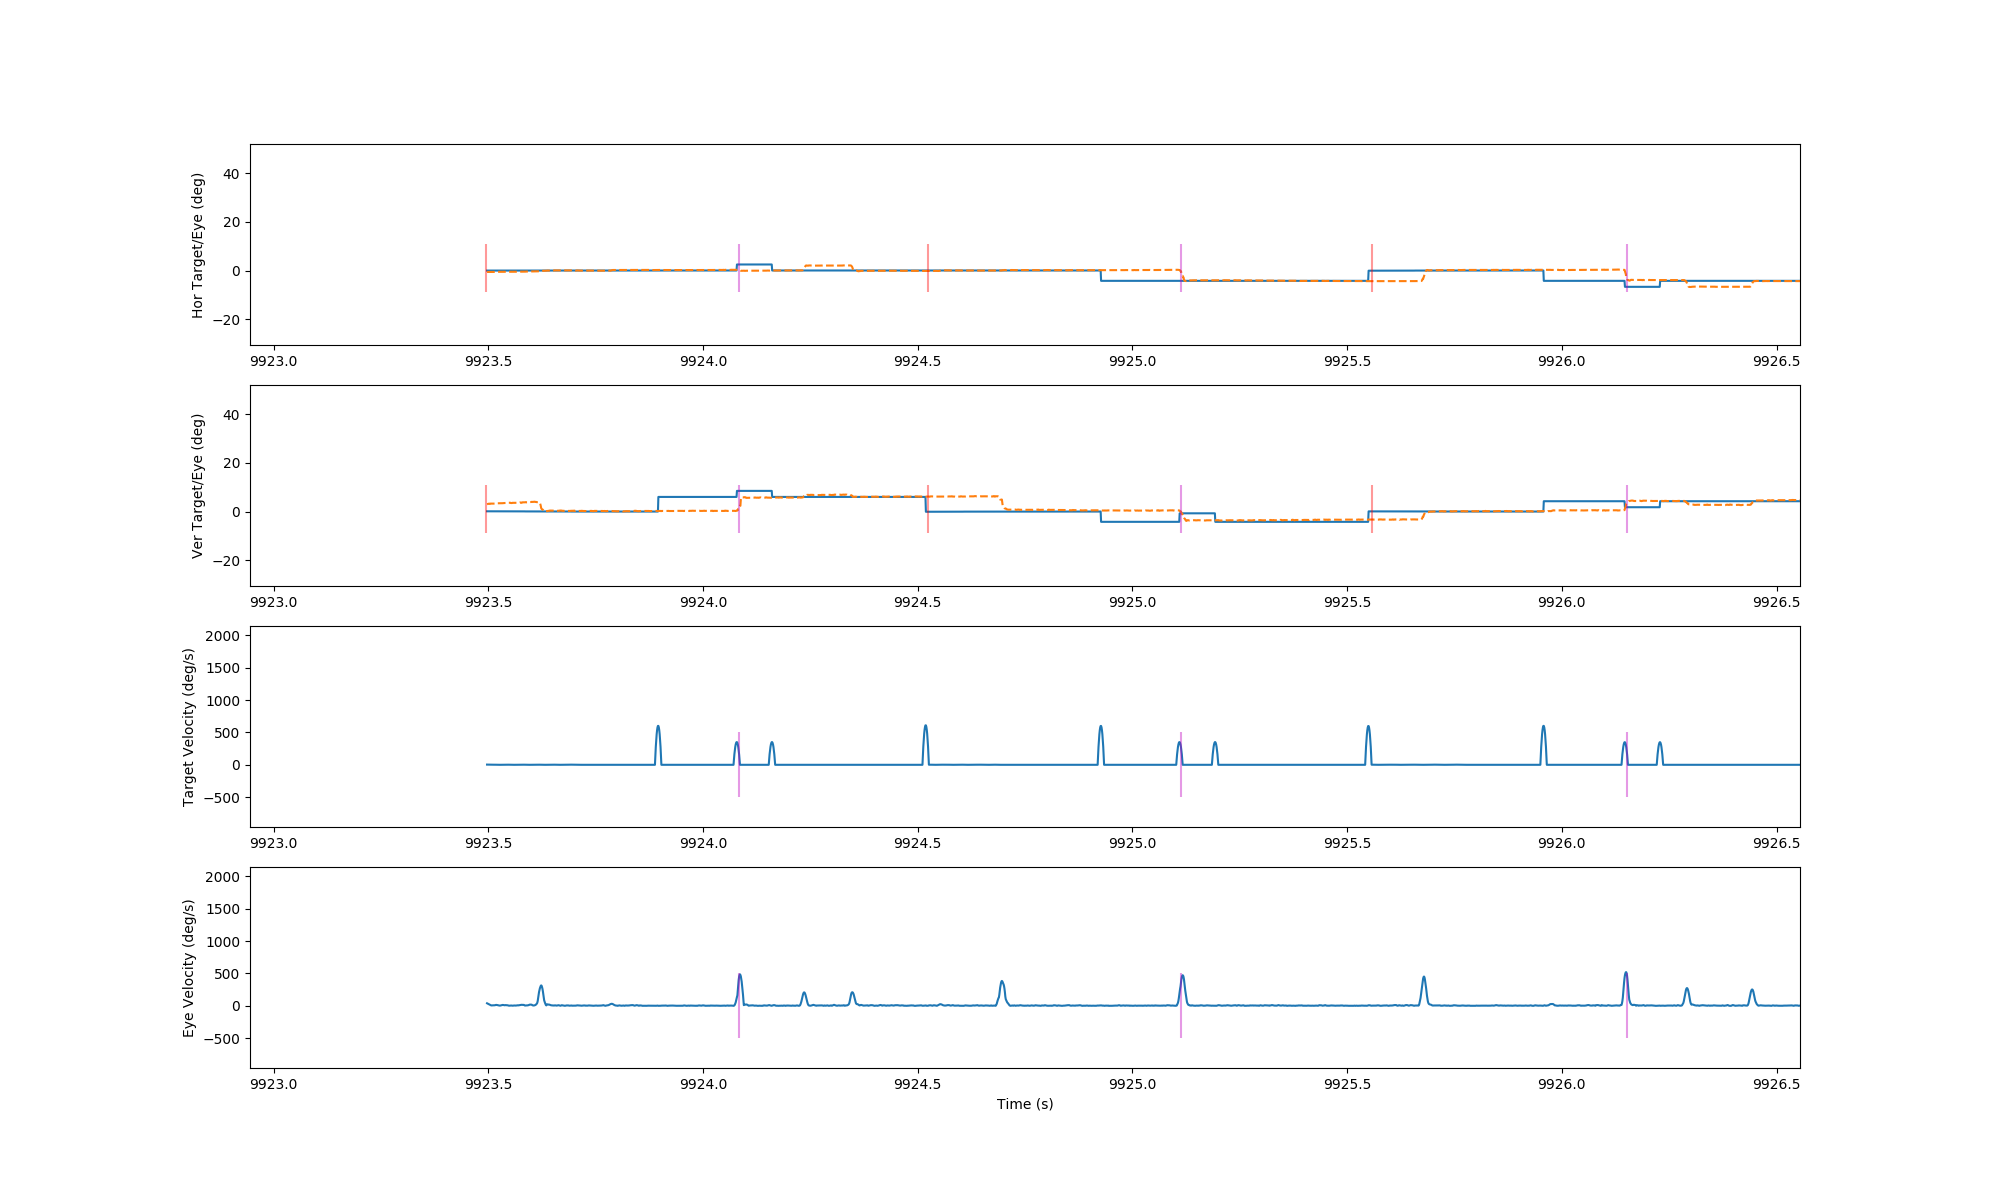

In [30]:
import gc
gc.collect()

plt.figure(figsize=(20,12))
ax1 = plt.subplot(411)
plt.eventplot(trial_start_times, linelengths=20, colors='r', zorder=10, alpha = 0.4)
plt.plot(mysess.t_HT, mysess.HT)
plt.plot(mysess.t_HT, mysess.HE, '--')
h = plt.ylabel('Hor Target/Eye (deg)')
plt.eventplot(dwell_start_times, linelengths=20, colors='m', zorder=10, alpha = 0.4)

# h.set_rotation(-45)
plt.subplot(412, sharex=ax1, sharey=ax1)
plt.plot(mysess.t_VT, mysess.VT)
plt.plot(mysess.t_VT, mysess.VE, '--')
plt.ylabel('Ver Target/Eye (deg)')
plt.eventplot(trial_start_times, linelengths=20, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(dwell_start_times, linelengths=20, colors='m', zorder=10, alpha = 0.4)

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(mysess.t_VT, mysess.T_v_filtered)
plt.ylabel('Target Velocity (deg/s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(mysess.t_VT[mysess.target_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_onsets[iss_targets_successful_trials]],linelengths=1000, colors='r', zorder=10, alpha = 1)
# plt.eventplot(mysess.t_VT[mysess.target_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)
# plt.eventplot(mysess.target_offset_times[non_iss_target_jumps_with_successfull_following_iss_tj],linelengths=5000, colors='m', zorder=10, alpha = 0.9)
# plt.eventplot(deliver_reward_times,linelengths=5000, colors='b', zorder=10, alpha = 0.4)
# plt.eventplot(trial_start_times, linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(dwell_start_times, linelengths=1000, colors='m', zorder=10, alpha = 0.4)
plt.eventplot(detect_sac_end_times, linelengths=1000, colors='m', zorder=10, alpha = 0.4)

ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
plt.plot(mysess.t_VE, mysess.E_v_filtered)
plt.ylabel('Eye Velocity (deg/s)')
plt.xlabel('Time (s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(mysess.t_VE[mysess.saccade_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(mysess.t_VE[mysess.saccade_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)
# plt.eventplot(trial_end_times, linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(dwell_start_times, linelengths=1000, colors='m', zorder=10, alpha = 0.4)
plt.eventplot(detect_sac_end_times, linelengths=1000, colors='m', zorder=10, alpha = 0.4)

plt.show()


In [1]:
plt.figure()
plt.plot(mysess.t_VT, mysess.VT)
plt.plot(mysess.t_VT, mysess.VE, '--')

NameError: name 'plt' is not defined

In [17]:
trial_end_times.shape

(134,)

In [20]:
prim_sac_wo_corr = []
for dst in dwell_start_times:
    if np.where(np.logical_and(trial_end_times > dst ,trial_end_times < dst + 0.700))[0].size!=0:
        if np.where(np.logical_and(mysess.saccade_onset_times > dst, mysess.saccade_onset_times < dst + 0.350 ))[0].size == 0:
            prim_sac_wo_corr.append(np.where(np.logical_and(mysess.saccade_offset_times > dst, mysess.saccade_offset_times < dst + 0.050 ))[0])

prim_sac_wo_corr = np.squeeze(np.array([psac[0] for psac in prim_sac_wo_corr if psac.size != 0]))    

In [21]:
prim_sac_wo_corr.shape

(299,)

In [27]:
corrective_saccades = []
for dst in dwell_start_times:
    if np.where(np.logical_and(trial_end_times > dst ,trial_end_times < dst + 0.700))[0].size!=0:
        corrective_saccades.append(np.where(np.logical_and(mysess.saccade_onset_times > dst, mysess.saccade_onset_times < dst + 0.350 ))[0])

corrective_saccades = np.squeeze(np.array([csac[0] for csac in corrective_saccades if csac.size != 0]))    

In [23]:
plt.eventplot(mysess.saccade_offset_times[prim_sac_wo_corr], linelengths=1000, colors='b', zorder=11, alpha = 1)


In [29]:
print('probability of corrective saccade = {}'.format(corrective_saccades.size/trial_end_times.size))

probability of corrective saccade = 0.6134453781512605


# Batch

In [31]:
from fhd import *
import OpenEphys
import matplotlib.pyplot as plt
import numpy as np
from kaveh.toolbox import find_file
import re

# source_path = '../data/behavioral/random_target_stepback/2019_11_12/'
source_path = '../data/behavioral/random_target_stepback/sessions_to_analyze/'
# source_path = '../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/'

fnames_behavioral = []
for root, dirnames, filenames in os.walk(source_path):
    for filename in filenames:
        f_regex = re.compile(r".*\.fhd$")
        if f_regex.match(filename):
            fnames_behavioral = fnames_behavioral + [os.path.join(root, filename)]
fnames_behavioral = np.array(fnames_behavioral)


In [45]:
class trial_events:
    pass
from kaveh.behavioral.oculomotor.session import session
prob_corrective_for_dt = []
for fn in fnames_behavioral:
    print('Loading {} ...'.format(fn))
    fhd_content = load(fn)

    HT = np.squeeze(fhd_content['target_x'])
    VT = np.squeeze(fhd_content['target_y'])
    HE = np.squeeze(fhd_content['right_horizontal_eye'])
    VE = np.squeeze(fhd_content['right_vertical_eye'])
    eye = np.linalg.norm(np.vstack((HE, VE)), axis = 0)
    # target = np.linalg.norm(np.vstack((target_x, target_y)), axis = 0)
    el_t = np.squeeze(fhd_content['t'])
    eye_t = np.squeeze(fhd_content['eyelink_time'])
    t_HT = el_t
    t_HE = el_t
    t_VT = el_t
    t_VE = el_t
    trials = fhd_content['trials']
    
    trialevents = []
    for trial in trials:
        trial_event = trial_events()
    #     if not np.array_equal(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start']):
    #         print(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start'])

        for k,v in zip(trial.keys(), trial.values()):
            exec('trial_event.' + k + '=v')
        trialevents.append(trial_event)
    dwell_time = trialevents[0].target_dwell_time
    trial_start_times = np.squeeze([ti.trial_start_time for ti in trialevents])
    trial_end_times = np.squeeze([ti.trial_end_time for ti in trialevents if hasattr(ti, 'trial_end_time')])
    dwell_start_times = np.squeeze(np.hstack([ti.target_state_start_time_dwell for ti in trialevents if hasattr(ti, 'target_state_start_time_dwell')]))

    mysess = session(HT, el_t, VT, el_t, HE, el_t, VE, el_t, 1000.0, 0.001)
    mysess._cut_to_min_size()
    mysess._calc_target_velocity()
    mysess._calc_saccade_velocity()

    mysess._detect_target_jumps(onoff_thresh = 30)
    mysess._detect_saccades(v_thresh = 150, onoff_thresh = 50)
#     corrective_saccades = []
#     for dst in dwell_start_times:
#         corrective_saccades.append(np.where(np.logical_and(mysess.saccade_onset_times > dst, mysess.saccade_onset_times < dst + 0.400 ))[0])

#     corrective_saccades = np.squeeze(np.array([csac[0] for csac in corrective_saccades if csac.size != 0]))   
    corrective_saccades = []
    for dst in dwell_start_times:
        if np.where(np.logical_and(trial_end_times > dst ,trial_end_times < dst + 0.700))[0].size!=0:
            corrective_saccades.append(np.where(np.logical_and(mysess.saccade_onset_times > dst, mysess.saccade_onset_times < dst + 0.350 ))[0])

    corrective_saccades = np.squeeze(np.array([csac[0] for csac in corrective_saccades if csac.size != 0]))    
    prob_corrective_for_dt.append([dwell_time[0], corrective_saccades.size/trial_end_times.size])

Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_090318.fhd ...


/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:142: RuntimeWarning: invalid value encountered in greater
  rising = self.E_v_filtered > v_thresh
/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:156: RuntimeWarning: invalid value encountered in less
  below_onset_offset_thresh = self.E_v_filtered < onoff_thresh


Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_145539.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_091937.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_092906.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_134804.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_091314.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_151008.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_084439.fhd ...
Loading ../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/random_target_backstep_085354.fhd ...


In [46]:
prob_corrective_for_dt_sorted = np.sort(np.array(prob_corrective_for_dt), axis=0)

In [47]:
prob_corrective_for_dt_sorted

array([[0.03      , 0.13861386],
       [0.04      , 0.1682243 ],
       [0.05      , 0.2       ],
       [0.06      , 0.30097087],
       [0.07      , 0.39393939],
       [0.08      , 0.45945946],
       [0.09      , 0.5       ],
       [0.1       , 0.54455446],
       [0.11      , 0.5984252 ]])

<IPython.core.display.Javascript object>


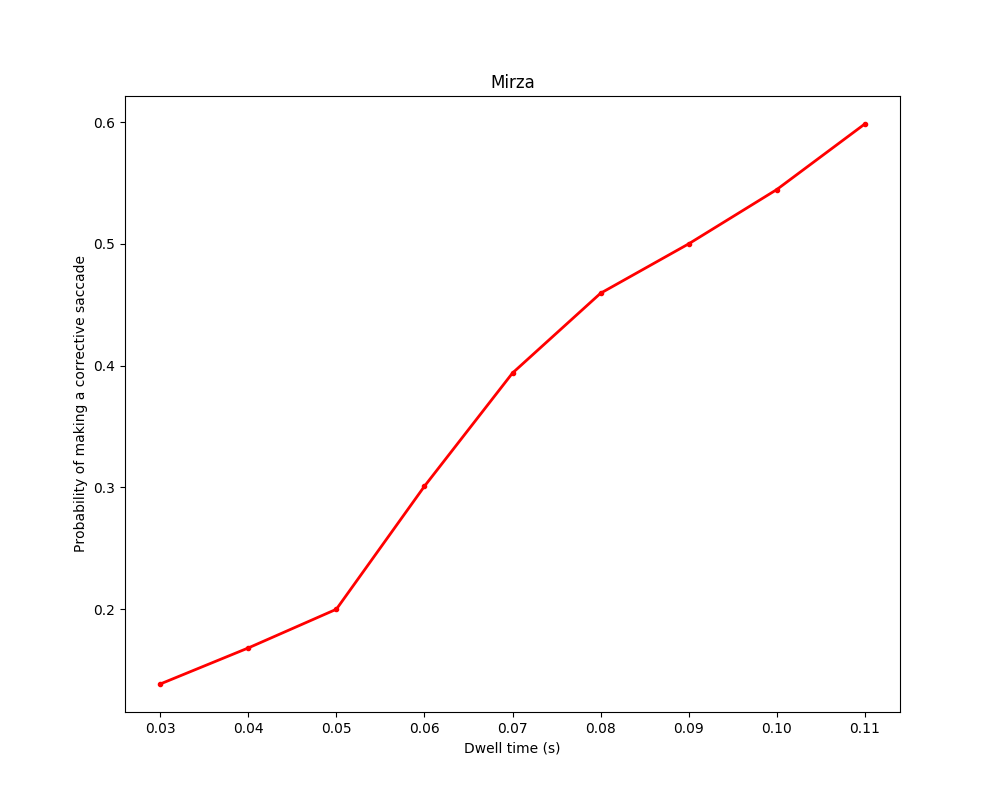

In [49]:
plt.figure(figsize=(10,8))
plt.plot(prob_corrective_for_dt_sorted[:,0], prob_corrective_for_dt_sorted[:,1], '.-r',linewidth=2)
plt.xlabel('Dwell time (s)')
plt.ylabel('Probability of making a corrective saccade')
plt.title('Mirza')
plt.savefig('../data/plots/dwell_time/prob_corrective_vs_dwell_time_mirza_successful_trials_only.png')
plt.savefig('../data/plots/dwell_time/prob_corrective_vs_dwell_time_mirza_successful_trials_only.svg')

## Probabity of (not) making corrective saccades, block wise, constant dwell time

In [1]:
from fhd import *
import OpenEphys
import matplotlib.pyplot as plt
import numpy as np
from kaveh.toolbox import find_file
import re

# source_path = '../data/behavioral/random_target_stepback/2019_11_12/'
# source_path = '../data/behavioral/random_target_stepback/sessions_to_analyze/'
# source_path = '../data/behavioral/random_target_stepback/sessions_to_analyze_mirza/'
source_path = '../data/behavioral/random_target_stepback/2019_11_19/'
fnames_behavioral = []
for root, dirnames, filenames in os.walk(source_path):
    for filename in filenames:
        f_regex = re.compile(r".*\.fhd$")
        if f_regex.match(filename):
            fnames_behavioral = fnames_behavioral + [os.path.join(root, filename)]
fnames_behavioral = np.array(fnames_behavioral)
fname_timestamps = [int(f.split('.')[-2].split('_')[-1]) for f in fnames_behavioral]
fnames_sorted = fnames_behavioral[np.argsort(fname_timestamps)]

In [2]:
class trial_events:
    pass
from kaveh.behavioral.oculomotor.session import session
prob_not_making_corr_saccade_for_block = []
for fn in fnames_sorted:
    print('Loading {} ...'.format(fn))
    fhd_content = load(fn)

    HT = np.squeeze(fhd_content['target_x'])
    VT = np.squeeze(fhd_content['target_y'])
    HE = np.squeeze(fhd_content['right_horizontal_eye'])
    VE = np.squeeze(fhd_content['right_vertical_eye'])
    eye = np.linalg.norm(np.vstack((HE, VE)), axis = 0)
    # target = np.linalg.norm(np.vstack((target_x, target_y)), axis = 0)
    el_t = np.squeeze(fhd_content['t'])
    eye_t = np.squeeze(fhd_content['eyelink_time'])
    t_HT = el_t
    t_HE = el_t
    t_VT = el_t
    t_VE = el_t
    trials = fhd_content['trials']
    
    trialevents = []
    for trial in trials:
        trial_event = trial_events()
    #     if not np.array_equal(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start']):
    #         print(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start'])

        for k,v in zip(trial.keys(), trial.values()):
            exec('trial_event.' + k + '=v')
        trialevents.append(trial_event)
    dwell_time = trialevents[0].target_dwell_time
    trial_start_times = np.squeeze([ti.trial_start_time for ti in trialevents])
    trial_end_times = np.squeeze([ti.trial_end_time for ti in trialevents if hasattr(ti, 'trial_end_time')])
    dwell_start_times = np.squeeze(np.hstack([ti.target_state_start_time_dwell for ti in trialevents if hasattr(ti, 'target_state_start_time_dwell')]))

    mysess = session(HT, el_t, VT, el_t, HE, el_t, VE, el_t, 1000.0, 0.001)
    mysess._cut_to_min_size()
    mysess._calc_target_velocity()
    mysess._calc_saccade_velocity()

    mysess._detect_target_jumps(onoff_thresh = 30)
    mysess._detect_saccades(v_thresh = 150, onoff_thresh = 50)
#     corrective_saccades = []
#     for dst in dwell_start_times:
#         corrective_saccades.append(np.where(np.logical_and(mysess.saccade_onset_times > dst, mysess.saccade_onset_times < dst + 0.400 ))[0])

#     corrective_saccades = np.squeeze(np.array([csac[0] for csac in corrective_saccades if csac.size != 0]))   
    prim_sac_wo_corr = []
    dwell_corrective_saccades = []
    for dst in dwell_start_times:
        if np.where(np.logical_and(trial_end_times > dst ,trial_end_times < dst + 0.700))[0].size!=0:
            corr_sacc = np.where(np.logical_and(mysess.saccade_onset_times > dst, mysess.saccade_onset_times < dst + 0.350 ))[0]
            if corr_sacc.size == 0:
                prim_sac_wo_corr.append(np.where(np.logical_and(mysess.saccade_offset_times > dst, mysess.saccade_offset_times < dst + 0.050 ))[0])
            else:
                dwell_corrective_saccades.append(np.where(np.logical_and(mysess.saccade_offset_times > dst, mysess.saccade_offset_times < dst + 0.050 ))[0])


    prim_sac_wo_corr = np.squeeze(np.array([psac[0] for psac in prim_sac_wo_corr if psac.size != 0]))    
    dwell_corrective_saccades = np.squeeze([dcs[0] for dcs in dwell_corrective_saccades if dcs.size != 0])
    rate_of_not_making_corrective_saccade = np.bincount(np.digitize(np.squeeze(mysess.saccade_offset_times[prim_sac_wo_corr]), bins = np.arange(el_t[0],el_t[-1], 30)), minlength=65)
    rate_of_making_corrective_saccade = np.bincount(np.digitize(np.squeeze(mysess.saccade_offset_times[dwell_corrective_saccades]), bins = np.arange(el_t[0],el_t[-1], 30)), minlength=65)
    prob_not_making_corr_sac = rate_of_not_making_corrective_saccade/(rate_of_making_corrective_saccade + rate_of_not_making_corrective_saccade)
    prob_not_making_corr_saccade_for_block.append(prob_not_making_corr_sac)

Loading ../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_120216.fhd ...


/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:142: RuntimeWarning: invalid value encountered in greater
  rising = self.E_v_filtered > v_thresh
/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:156: RuntimeWarning: invalid value encountered in less
  below_onset_offset_thresh = self.E_v_filtered < onoff_thresh
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


Loading ../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_122653.fhd ...
Loading ../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_124437.fhd ...
Loading ../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_131049.fhd ...
Loading ../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_131923.fhd ...
Loading ../data/behavioral/random_target_stepback/2019_11_19/random_target_backstep_134057.fhd ...


In [3]:
prob_not_making_corr_saccade_for_block

[array([       nan, 0.33333333, 0.57142857, 0.33333333, 0.4       ,
        0.55555556, 0.14285714, 0.33333333, 0.61538462, 0.36363636,
        0.28571429, 0.63636364, 0.71428571, 0.71428571, 0.75      ,
        0.64285714, 0.9       , 0.66666667, 0.66666667, 0.5       ,
        0.61538462, 0.57142857,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]),
 array([       nan, 0.35714286, 0.44444444, 0.        , 0.8       ,
        0.44444444, 0.66666667, 0.66666667, 0.

In [21]:
len(prob_making_corr_saccade_for_block)

6

In [7]:
np.arange(0,1,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

Text(0.5, 0.98, 'Probability of not making a corrective saccade')

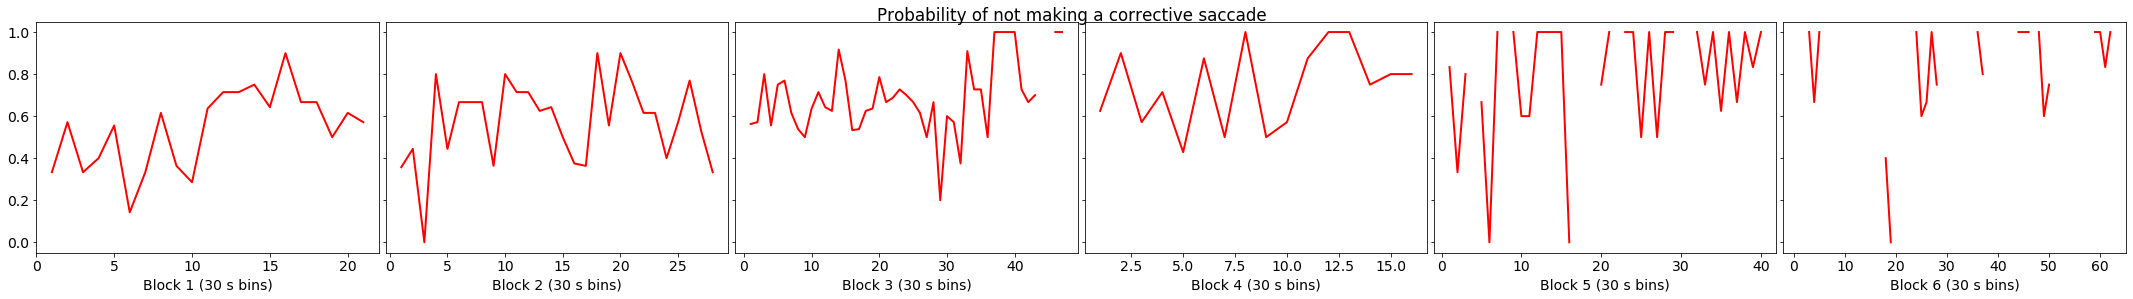

In [92]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 14})
# fig = plt.figure(figsize=(30,4))
# gs1 = gridspec.GridSpec(1, 6)
# gs1.update(wspace=0.025)
fig, axes = plt.subplots(nrows=1, ncols=len(prob_not_making_corr_saccade_for_block), sharey=True, figsize=(30,4))
fig.tight_layout()
fig.subplots_adjust(wspace=0.02) 

for spl in range(1,len(prob_not_making_corr_saccade_for_block)+1):
    axes[spl-1].plot(prob_not_making_corr_saccade_for_block[spl-1], linewidth=2,color='r')
    axes[spl-1].set_xlabel('Block {} (30 s bins)'.format(spl))
fig.suptitle('Probability of not making a corrective saccade')


In [93]:
fig.savefig('../data/plots/dwell_time/prob_of_not_making_corr_vs_blocks_80msdt.png')
fig.savefig('../data/plots/dwell_time/prob_of_not_making_corr_vs_blocks_80msdt.svg')